In [1]:
import numpy as np
x_t=np.array([[0.5]]) #  input at current time stamp
h_prev=np.array([[0.0]])  # previous hidden state 
# adding ting weights 
W_xh=np.array([[0.8]])
W_hh=np.array([[0.5]])
b_h=np.array([[0.0]])
# forward computation
z=W_xh @ x_t + W_hh @ h_prev +b_h
h_next=np.tanh(z)

print("z:",z)
print("h_next:",h_next)

z: [[0.4]]
h_next: [[0.37994896]]


In [2]:
# next input 
x_t2=np.array([[0.3]])

# use previous h_next as h_prev
z2=W_xh @ x_t2 + W_hh @ h_next +b_h
h_next2=np.tanh(z2)
print("z2:",z2)
print("h_next2:",h_next2)

z2: [[0.42997448]]
h_next2: [[0.40529998]]


In [4]:
x_t=np.array([[0.5]])
h_prev=np.array([[0.0],[0.0]])
W_xh=np.array([[0.8],[0.3]])
W_hh=np.array([[0.5,0.5],[0.5,0.5]])
b_h=np.array([[0.0],[0.0]])

z=W_xh @ x_t + W_hh @ h_prev + b_h
h_next=np.tanh(z)

print("z:",z)
print("h_next:",h_next)


z: [[0.4 ]
 [0.15]]
h_next: [[0.37994896]
 [0.14888503]]


In [5]:
import numpy as np

# RNN parameters
W_xh = np.array([[0.2], [0.4]])        # 2 hidden units, 1 input
W_hh = np.array([[0.5, 0.5], [0.1, 0.3]])  # 2 hidden units, 2 previous hidden
b_h = np.array([[0.0], [0.0]])

# Input sequence (3 timesteps)
X = [0.1, 0.2, 0.3]

# Initial hidden state
h_prev = np.array([[0.0], [0.0]])

# Process sequence
for t, x_t in enumerate(X):
    x_t = np.array([[x_t]])          # shape (1,1)
    z = W_xh @ x_t + W_hh @ h_prev + b_h
    h_next = np.tanh(z)
    print(f"Time {t}: x_t={x_t.ravel()}, h_prev={h_prev.ravel()}, h_next={h_next.ravel()}")
    h_prev = h_next  # pass to next timestep


Time 0: x_t=[0.1], h_prev=[0. 0.], h_next=[0.01999733 0.03997868]
Time 1: x_t=[0.2], h_prev=[0.01999733 0.03997868], h_next=[0.06987396 0.09371751]
Time 2: x_t=[0.3], h_prev=[0.06987396 0.09371751], h_next=[0.140853   0.15387074]


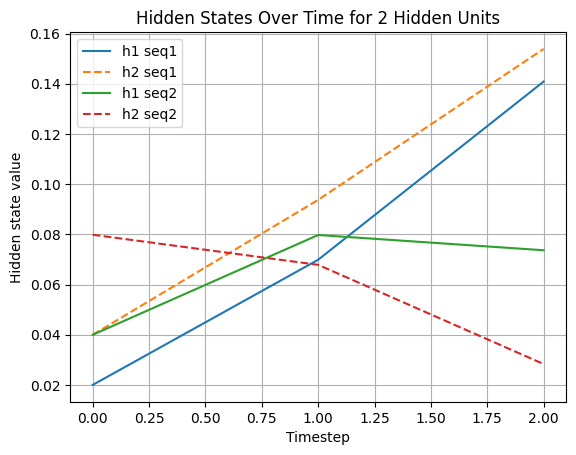

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# RNN parameters (2 hidden units, 1 input)
W_xh = np.array([[0.2], [0.4]])
W_hh = np.array([[0.5, 0.5], [0.1, 0.3]])
b_h = np.array([[0.0], [0.0]])

# Two sequences of 3 timesteps each
X_sequences = [
    [0.1, 0.2, 0.3],
    [0.2, 0.1, 0.0]
]

hidden_size = 2
seq_length = 3
num_sequences = len(X_sequences)

# Store hidden states
H = np.zeros((hidden_size, seq_length, num_sequences))

# Process each sequence
for seq_idx, X in enumerate(X_sequences):
    h_prev = np.zeros((hidden_size, 1))
    for t, x_t in enumerate(X):
        x_t = np.array([[x_t]])
        z = W_xh @ x_t + W_hh @ h_prev + b_h
        h_next = np.tanh(z)
        H[:, t, seq_idx] = h_next.ravel()
        h_prev = h_next

# Visualize hidden states
for seq_idx in range(num_sequences):
    plt.plot(H[0, :, seq_idx], label=f'h1 seq{seq_idx+1}')
    plt.plot(H[1, :, seq_idx], label=f'h2 seq{seq_idx+1}', linestyle='--')

plt.xlabel("Timestep")
plt.ylabel("Hidden state value")
plt.title("Hidden States Over Time for 2 Hidden Units")
plt.legend()
plt.grid(True)
plt.show()
